In [52]:
import pandas as pd
import numpy as np
import matplotlib as malt

In [53]:
data=pd.read_csv('AB_NYC_2019.csv')

In [54]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [55]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


 Handle Missing Values

In [56]:
print(data.isnull().sum())


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [57]:
data['name'] = data['name'].fillna("Unknown Listing")


In [58]:
data['host_name'] = data['host_name'].fillna("Unknown Host")


In [59]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['last_review'] = data['last_review'].fillna("No Reviews")



In [60]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [61]:
print(data.isnull().sum())  

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [63]:
print(data.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [64]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['last_review_year'] = data['last_review'].dt.year.fillna(0)  
data['last_review_month'] = data['last_review'].dt.month.fillna(0)
data.drop(columns=['last_review'], inplace=True) 


In [65]:
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)


In [66]:

q1, q3 = np.percentile(data['price'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

data[num_cols] = scaler.fit_transform(data[num_cols])


In [68]:
data.head(
)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.357393,0.511921,0.446108,0.000000,0.014308,0.003590,0.015337,1.000000,2018.0,10.0,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.614199,0.490469,0.673653,0.000000,0.071542,0.006496,0.003067,0.972603,2019.0,5.0,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.748252,0.569257,0.449102,0.001601,0.000000,0.000000,0.000000,1.000000,0.0,0.0,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.448496,0.535649,0.266467,0.000000,0.429253,0.079316,0.000000,0.531507,2019.0,7.0,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.722820,0.565324,0.239521,0.007206,0.014308,0.001709,0.000000,0.000000,2018.0,11.0,False,False


In [69]:
data['host_activity_level'] = data['reviews_per_month'] / (data['calculated_host_listings_count'] + 1)


In [70]:
from datetime import datetime

data['days_since_last_review'] = (datetime.now().year - data['last_review_year']) * 365 + (12 - data['last_review_month']) * 30
data['days_since_last_review'] = data['days_since_last_review'].replace({datetime.now().year * 365: 0})


In [71]:
data['price_per_minimum_night'] = data['price'] / (data['minimum_nights'] + 1)
data['price_per_minimum_night'] = scaler.fit_transform(data[['price_per_minimum_night']])


In [72]:
data['high_availability_flag'] = data['availability_365'].apply(lambda x: 1 if x == 365 else 0)


In [73]:
data['review_rate_flag'] = data.apply(lambda x: 1 if x['number_of_reviews'] == 0 and x['availability_365'] > 200 else 0, axis=1)


In [74]:
data.drop(columns=['last_review_year', 'last_review_month', 'minimum_nights'], inplace=True)


In [75]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
price                             float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
room_type_Private room               bool
room_type_Shared room                bool
host_activity_level               float64
days_since_last_review            float64
price_per_minimum_night           float64
high_availability_flag              int64
review_rate_flag                    int64
dtype: object

In [76]:
data['is_fake'] = data.apply(lambda x: 1 if (
    (x['price_per_minimum_night'] < 15) +  # Lowered threshold
    (x['host_activity_level'] < 0.005) +  # Even stricter inactivity check
    (x['high_availability_flag'] == 1) +  # Consider only high availability
    (x['days_since_last_review'] > 1825)  # 5 years instead of 4
) >= 3 else 0, axis=1)

print(data['is_fake'].value_counts())  # Check new fake count


is_fake
0    24748
1    21175
Name: count, dtype: int64


In [77]:
print(data[data['is_fake'] == 1].head(20))  # See some "fake" listings


       id                                               name  host_id  \
0    2539                 Clean & quiet apt home by the park     2787   
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
4    5022   Entire Apt: Spacious Studio/Loft by central park     7192   
14   6090                      West Village Nest - Superhost    11975   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
20   7801                   Sweet and Spacious Brooklyn Loft    21207   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
29   9657                   Modern 1 BR / NYC / EAST VILLAGE    21904   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   
42  12303                  1bdr w private bath. in lofty apt    47618   
48  13050                          bright and stylish duplex    50846   
54  14322                Beautiful Apartment in Man

In [78]:
print(data[data['is_fake'] == 1].head(10))


       id                                               name  host_id  \
0    2539                 Clean & quiet apt home by the park     2787   
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
4    5022   Entire Apt: Spacious Studio/Loft by central park     7192   
14   6090                      West Village Nest - Superhost    11975   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
20   7801                   Sweet and Spacious Brooklyn Loft    21207   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
29   9657                   Modern 1 BR / NYC / EAST VILLAGE    21904   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   

          host_name neighbourhood_group       neighbourhood  latitude  \
0              John            Brooklyn          Kensington  0.357393   
2         Elisabeth           Manhattan           

In [79]:
print(data[data['price_per_minimum_night'] < 5].shape[0])  # Too strict?
print(data[data['host_activity_level'] < 0.05].shape[0])  # Too many inactive?
print(data[(data['review_rate_flag'] == 1) & (data['high_availability_flag'] == 1)].shape[0])
print(data[data['days_since_last_review'] > 1095].shape[0])  # Too many inactive reviews?


45923
40188
0
45923


In [80]:
import pandas as pd

# Assuming 'data' is your DataFrame

def classify_suspicious(row):
    if row['price_per_minimum_night'] < 5:
        if row['host_activity_level'] > 0.05 or row['days_since_last_review'] < 365:
            return 1  # 🚩 Possibly Suspicious (New & Active Host)
        elif row['calculated_host_listings_count'] > 5 or row['host_activity_level'] == 0:
            return 2  # 🚨 More Likely Fake (Inactive or Multi-listing Host)
    return 0  # ✅ Likely Real

# Apply classification logic
data['suspicious_flag'] = data.apply(classify_suspicious, axis=1)

# Checking counts
print(data['suspicious_flag'].value_counts())


suspicious_flag
0    31176
2     9012
1     5735
Name: count, dtype: int64


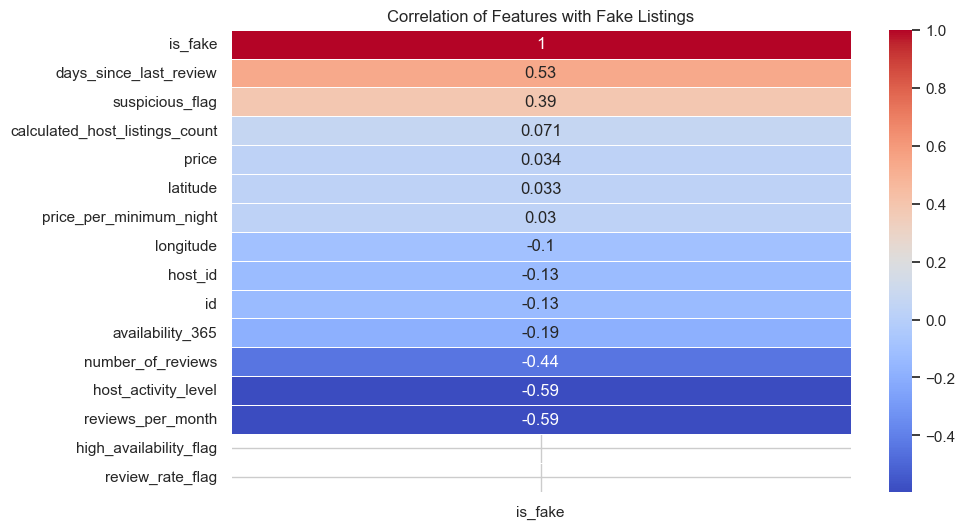

In [82]:
numeric_data = data.select_dtypes(include=[np.number])  # Keep only numeric features
corr_matrix = numeric_data.corr()

# Now plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['is_fake']].sort_values(by='is_fake', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Fake Listings")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19148\1788962146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['suspicious_flag'], palette="coolwarm")


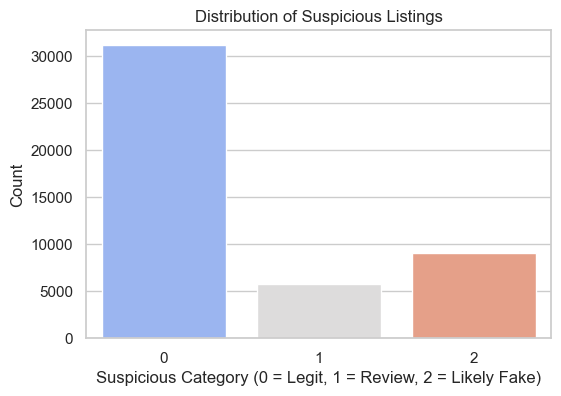

C:\Users\hp\AppData\Local\Temp\ipykernel_19148\1788962146.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['suspicious_flag'], y=data['price'], palette="coolwarm")


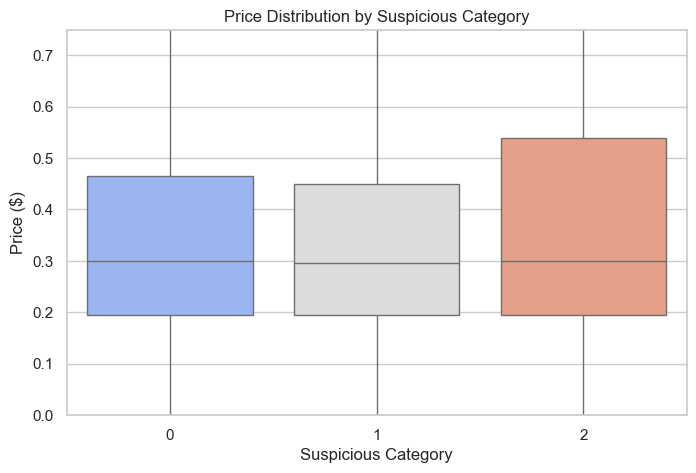

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Figure 1: Bar chart of suspicious_flag distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data['suspicious_flag'], palette="coolwarm")
plt.title("Distribution of Suspicious Listings")
plt.xlabel("Suspicious Category (0 = Legit, 1 = Review, 2 = Likely Fake)")
plt.ylabel("Count")
plt.show()

# Figure 3: Boxplot of price across suspicious_flag categories
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['suspicious_flag'], y=data['price'], palette="coolwarm")
plt.ylim(0, data['price'].quantile(0.95))  # Limit extreme values for better visualization
plt.title("Price Distribution by Suspicious Category")
plt.xlabel("Suspicious Category")
plt.ylabel("Price ($)")
plt.show()


In [85]:
data.to_csv("filtered_listings.csv", index=False)
